# Optimization in Julia

<img src="julia_opt_logo.svg" alt="Drawing" style="width: 100px;"/>

# JuliaOpt - Overview
<img src="julia_opt.svg" alt="Drawing" style="width: 750px;"/>

# Optim.jl

The Optim package provides functions for solving unconstrained/box-constrained optimization problems.

We use the Rosenbrock function to demonstrate some of its capabilities.

In [1]:
using Optim

function f(x::Vector)
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end

f (generic function with 1 method)

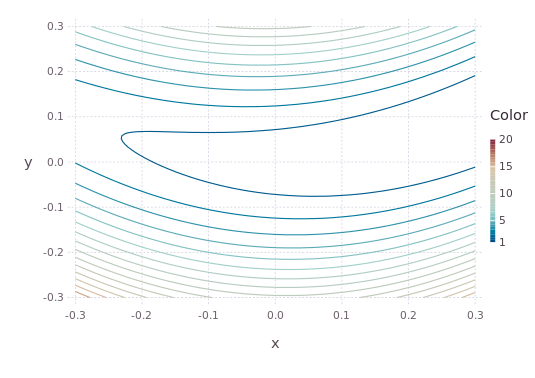

In [2]:
using Gadfly
plot(z=(x,y)->f([x,y]), 
     x=linspace(-0.3, 0.3, 100), y=linspace(-0.3,0.3,100), Geom.contour)

The optimize function can be used to find the minimum of Rosenbrock:

In [3]:
start = [0.0, 0.0]
optimize(f, start)

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [0.0,0.0]
 * Minimizer: [1.000005438687492,1.0000079372595394]
 * Minimum: 8.940246e-10
 * Iterations: 60
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < NaN: false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 116


The algorithm used to minimize can be optionally specified:

In [4]:
res = optimize(f, [0.0, 0.0], NelderMead())

Results of Optimization Algorithm
 * Algorithm: Nelder-Mead
 * Starting Point: [0.0,0.0]
 * Minimizer: [1.000005438687492,1.0000079372595394]
 * Minimum: 8.940246e-10
 * Iterations: 60
 * Convergence: true
   *  √(Σ(yᵢ-ȳ)²)/n < NaN: false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 116


Other algorithms include: `BFGS()`, `LBFGS()`, `SimulatedAnnealing()`, `ConjugateGradient()`, `GradientDescent()`, `AcceleratedGradientDescent()`

# Accessing results

Optim provides several functions for querying the output from an algorithm.


In [5]:
Optim.minimum(res), Optim.minimizer(res)

(8.940245976539097e-10,[1.000005438687492,1.0000079372595394])

Other functions include: `Optim.x_trace(res)`, `Optim.f_trace(res)`, `Optim.f_calls(res)`, `Optim.converged(res)`

# Including Gradient Information

In [6]:
function g!(x::Vector, storage::Vector)
    storage[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
    storage[2] = 200.0 * (x[2] - x[1]^2)
end

function h!(x::Vector, storage::Matrix)
    storage[1, 1] = 2.0 - 400.0 * x[2] + 1200.0 * x[1]^2
    storage[1, 2] = -400.0 * x[1]
    storage[2, 1] = -400.0 * x[1]
    storage[2, 2] = 200.0
end

h! (generic function with 1 method)

In [7]:
optimize(f, g!, h!, [0.0, 0.0], Newton())

Results of Optimization Algorithm
 * Algorithm: Newton's Method
 * Starting Point: [0.0,0.0]
 * Minimizer: [0.9999999999979515,0.9999999999960232]
 * Minimum: 5.639268e-24
 * Iterations: 13
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: true
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 54
 * Gradient Calls: 54

See the Github page for more details on this package: https://github.com/JuliaOpt/Optim.jl

# LsqFit.jl

# JuMP.jl
JuMP (Julia Mathematical Programming) is a modelling package for constrained optimization.

In [12]:
using JuMP

m = Model()
@variable(m, 0 <= x <= 2 )
@variable(m, 0 <= y <= 30 )

@objective(m, Max, 5x + 3*y )
@constraint(m, 1x + 5y <= 3.0 )

print(m)

Max 5 x + 3 y
Subject to
 x + 5 y ≤ 3
 0 ≤ x ≤ 2
 0 ≤ y ≤ 30


In [13]:
status = solve(m)

println("Objective value: ", getobjectivevalue(m))
println("x = ", getvalue(x))
println("y = ", getvalue(y))

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 5e+00]
  Objective range [3e+00, 5e+00]
  Bounds range    [2e+00, 3e+01]
  RHS range       [3e+00, 3e+00]
Presolve removed 1 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0600000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  1.060000000e+01
Objective value: 10.6
x = 2.0
y = 0.2


# Model Creation

The first step in implementing an optimization problem is to construct a model object.

In [18]:
m = Model();

Optionally, one can specify a specific solver. Solver customization options such as maximum iterations are set in the construction of the solver object.

In [19]:
using Clp

m = Model(solver=ClpSolver(MaximumIterations=100));

# Available Interfaces
To solve a problem, JuMP must use

<table style="text-align: center; margin-top: 20px" width="100%">
  <thead>
    <tr>
      <th width="23%"><strong>Modeling Tool</strong></th>
      <th width="9%">LP</th>
      <th width="9%">MILP</th>
      <th width="9%">SOCP</th>
      <th width="9%">MISOCP</th>
      <th width="9%">SDP</th>
      <th width="9%">NLP</th>
      <th width="9%">MINLP</th>
      <th>Other</th>
    </tr>
  </thead>

  <tfoot> <!-- Must appear before tbody, see W3.org -->
    <tr style="text-align: left">
      <td colspan="10">
        <small>
  <strong>Key:</strong>
  <ul style="list-style: none; margin-top: 5px; margin-bottom: 5px">
          <li style="margin: 0.1em 0;">LP = <a href="http://en.wikipedia.org/wiki/Linear_programming">Linear Programming</a></li>
          <li style="margin: 0.1em 0;">MILP = <a href="http://en.wikipedia.org/wiki/Integer_programming">Mixed Integer LP</a></li>
          <li style="margin: 0.1em 0;">SOCP = <a href="http://en.wikipedia.org/wiki/Second_order_cone_programming">Second-order cone programming</a> (includes convex <a href="http://en.wikipedia.org/wiki/Quadratic_programming">QP</a>, <a href="http://en.wikipedia.org/wiki/Quadratically_constrained_quadratic_program">QCQP</a>)</li>
          <li style="margin: 0.1em 0;">MISOCP = Mixed Integer SOCP</li>
          <li style="margin: 0.1em 0;">SDP = <a href="http://en.wikipedia.org/wiki/Semidefinite_programming">Semidefinite Programming</a></li>
          <li style="margin: 0.1em 0;">NLP = (constrained) <a href="http://en.wikipedia.org/wiki/Nonlinear_programming">Nonlinear Programming</a> (includes general <a href="http://en.wikipedia.org/wiki/Quadratic_programming">QP</a>, <a href="http://en.wikipedia.org/wiki/Quadratically_constrained_quadratic_program">QCQP</a>)</li>
          <li style="margin: 0.1em 0;">MINLP = Mixed Integer NLP</li>
        </ul>
        <strong>Notes:</strong>
        <ol style="">
          <li>Problem must be convex.</li>
        </ol>
  </small>
      </td>
    </tr>
  </tfoot>

  <tbody>
    <tr>
      <th><a href="https://github.com/JuliaOpt/JuMP.jl">JuMP</a></th>
      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td> <!-- MILP -->
      <td>&#10004;</td> <!-- SOCP -->
      <td>&#10004;</td> <!-- MISOCP -->
      <td>&#10004;</td> <!-- SDP -->
      <td>&#10004;</td> <!-- NLP -->
      <td>&#10004;</td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>

    <tr>
      <th><a href="https://github.com/cvxgrp/Convex.jl">Convex.jl</a></th>
      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td> <!-- MILP -->
      <td>&#10004;</td> <!-- SOCP -->
      <td>&#10004;</td> <!-- MISOCP -->
      <td>&#10004;</td> <!-- SDP -->
      <td></td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>

    <thead>
      <tr>
        <th><strong>Solver</strong></th>
        <th>LP</th>
        <th>MILP</th>
        <th>SOCP</th>
        <th>MISOCP</th>
        <th>SDP</th>
        <th>NLP</th>
        <th>MINLP</th>
        <th>Other</th>
      </tr>
    </thead>
    
    <tr>
      <th>
        <a href="https://projects.coin-or.org/Bonmin">Bonmin</a>
        <a href="https://github.com/JuliaOpt/AmplNLWriter.jl">(via AmplNLWriter.jl)</a>
      </th>

      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td> <!-- MILP -->
      <td></td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td>&#10004;</td> <!-- NLP -->
      <td>&#10004;</td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>
    
    <tr>
      <th>
        <a href="https://projects.coin-or.org/Cbc">Cbc</a>
        <a href="https://github.com/JuliaOpt/Cbc.jl">(.jl)</a>
      </th>

      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td> <!-- MILP -->
      <td></td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td></td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>

    <tr>
      <th>
        <a href="https://projects.coin-or.org/Clp">Clp</a>
        <a href="https://github.com/JuliaOpt/Clp.jl">(.jl)</a>
      </th>

      <td>&#10004;</td> <!-- LP -->
      <td></td> <!-- MILP -->
      <td></td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td></td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>

    <tr>
      <th>
        <a href="https://projects.coin-or.org/Couenne">Couenne</a>
        <a href="https://github.com/JuliaOpt/AmplNLWriter.jl">(via AmplNLWriter.jl)</a>
      </th>

      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td> <!-- MILP -->
      <td></td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td>&#10004;</td> <!-- NLP -->
      <td>&#10004;</td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>
    
    <tr>
      <th>
        <a href="http://www-01.ibm.com/software/commerce/optimization/cplex-optimizer/">CPLEX</a> 
        <a href="https://github.com/JuliaOpt/CPLEX.jl">(.jl)</a>
      </th>
      <!--<td><a href="https://github.com/JuliaOpt/CPLEX.jl">CPLEX.jl</a></td>-->
      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td> <!-- MILP -->
      <td>&#10004;</td> <!-- SOCP -->
      <td>&#10004;</td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td></td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td><small>IP Callbacks</small></td> <!-- Other -->
    </tr>
    
    <tr>
      <th>
        <a href="https://github.com/ifa-ethz/ecos/">ECOS</a>
        <a href="https://github.com/JuliaOpt/ECOS.jl">(.jl)</a>
      </th>
      <!--<td><a href="https://github.com/JuliaOpt/ECOS.jl">ECOS.jl</a></td>-->
      <td>&#10004;</td> <!-- LP -->
      <td></td> <!-- MILP -->
      <td>&#10004;</td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td></td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>
    
    <tr>
      <th>
        <a href="http://www.gnu.org/software/glpk/">GLPK</a>
        <a href="https://github.com/JuliaOpt/GLPK.jl">(.jl)</a>
      </th>
      <!--<td><a href="https://github.com/JuliaOpt/GLPK.jl">GLPK.jl</a></td>-->
      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td> <!-- MILP -->
      <td></td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td></td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td><small>IP Callbacks</small></td> <!-- Other -->
    </tr>

    <tr>
      <th>
        <a href="http://www.gurobi.com">Gurobi</a>
        <a href="https://github.com/JuliaOpt/Gurobi.jl">(.jl)</a>
      </th>
      <!--<td><a href="https://github.com/JuliaOpt/Gurobi.jl">Gurobi.jl</a></td>-->
      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td> <!-- MILP -->
      <td>&#10004;</td> <!-- SOCP -->
      <td>&#10004;</td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td></td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td><small>IP Callbacks</small></td> <!-- Other -->
    </tr>

    <tr>
      <th>
        <a href="https://projects.coin-or.org/Ipopt">Ipopt</a>
        <a href="https://github.com/JuliaOpt/Ipopt.jl">(.jl)</a>
      </th>
      <!--<td><a href="https://github.com/JuliaOpt/Ipopt.jl">Ipopt.jl</a></td>-->
      <td>&#10004;</td> <!-- LP -->
      <td></td> <!-- MILP -->
      <td></td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td>&#10004;</td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>
    
    <tr>
      <th>
        <a href="http://artelys.com/en/optimization-tools/knitro">Artelys Knitro</a>
        <a href="https://github.com/JuliaOpt/KNITRO.jl">(.jl)</a>
      </th>
      <!--<td><a href="https://github.com/JuliaOpt/KNITRO.jl/">KNITRO.jl</a></td>-->
      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td></td> <!-- MILP -->
      <td></td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td>&#10004;</td> <!-- NLP -->
      <td>&#10004;</td></td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>
    
    <tr>
      <th>
        <a href="http://www.mosek.com/">Mosek</a>
        <a href="https://github.com/JuliaOpt/Mosek.jl">(.jl)</a>
      </th>
      <!--<td><a href="https://github.com/JuliaOpt/Mosek.jl">Mosek.jl</a></td>-->
      <td>&#10004;</td> <!-- LP -->
      <td>&#10004;</td> <!-- MILP -->
      <td>&#10004;</td> <!-- SOCP -->
      <td>&#10004;</td> <!-- MISOCP -->
      <td>&#10004;</td> <!-- SDP -->
      <td>&#10004;<small>1</small></td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>

    <tr>
      <th>
        <a href="http://ab-initio.mit.edu/nlopt">NLopt</a>
        <a href="https://github.com/JuliaOpt/NLopt.jl">(.jl)</a>
      </th>
      <!--<td><a href="https://github.com/JuliaOpt/NLopt.jl">NLopt.jl</a></td>-->
      <td></td> <!-- LP -->
      <td></td> <!-- MILP -->
      <td></td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td></td> <!-- SDP -->
      <td>&#10004;</td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>
    
    <tr>
      <th>
        <a href="https://github.com/cvxgrp/scs">SCS</a>
        <a href="https://github.com/JuliaOpt/SCS.jl">(.jl)</a>
      </th>
      <!--<td><a href="https://github.com/JuliaOpt/NLopt.jl">NLopt.jl</a></td>-->
      <td>&#10004;</td> <!-- LP -->
      <td></td> <!-- MILP -->
      <td>&#10004;</td> <!-- SOCP -->
      <td></td> <!-- MISOCP -->
      <td>&#10004;</td> <!-- SDP -->
      <td></td> <!-- NLP -->
      <td></td> <!-- MINLP -->
      <td></td> <!-- Other -->
    </tr>

  </tbody>
</table>


# Variables

Variables can be created individually or in blocks, and optionally with bounds. Variables, and all other problem elements are associated with a model object.

In [50]:
@variable(m, 0 <= x[i=1:5] <= 1)

5-element Array{JuMP.Variable,1}:
 x[1]
 x[2]
 x[3]
 x[4]
 x[5]

In [23]:
@variable(m, y[i=1:5, j=1:10], Bin)

5x10 Array{JuMP.Variable,2}:
 y[1,1]  y[1,2]  y[1,3]  y[1,4]  y[1,5]  …  y[1,7]  y[1,8]  y[1,9]  y[1,10]
 y[2,1]  y[2,2]  y[2,3]  y[2,4]  y[2,5]     y[2,7]  y[2,8]  y[2,9]  y[2,10]
 y[3,1]  y[3,2]  y[3,3]  y[3,4]  y[3,5]     y[3,7]  y[3,8]  y[3,9]  y[3,10]
 y[4,1]  y[4,2]  y[4,3]  y[4,4]  y[4,5]     y[4,7]  y[4,8]  y[4,9]  y[4,10]
 y[5,1]  y[5,2]  y[5,3]  y[5,4]  y[5,5]     y[5,7]  y[5,8]  y[5,9]  y[5,10]

Variables over multiple indices can also be created using conditions. This is useful if you do not need to create variables over every combination of indices. For example, if you are modelling a problem on a sparse graph, you do not need to index over every pair of vertices to index over the edge set.

In [24]:
@variable(m, z[i=1:10,j=1:10; isodd(i+j)] >= 0)

z[i,j] ≥ 0 ∀ i ∈ {1,2,…,9,10}, j ∈ {1,2,…,9,10} s.t. isodd(i + j)

# Expressions



Constraints and Objective functions are made up of expressions. Expressions can be constructed in variety of ways.

In [56]:
expr = x[1] + 3 * y[1,2]

3 y[1,2] + x[1]

The `sum` syntax is providing for convenient summing over index sets. This can be used with the expression macro.

In [27]:
@expression(m, expr2, sum{x[i] + y[i,1], i=1:5})

x[1] + y[1,1] + x[2] + y[2,1] + x[3] + y[3,1] + x[4] + y[4,1] + x[5] + y[5,1]

In [53]:
A = rand(5,5)
A*x # Creates an array of expressions

5-element Array{JuMP.GenericAffExpr{Float64,JuMP.Variable},1}:
 0.154558971634555 x[1] + 0.5986104997777695 x[2] + 0.7655337856827646 x[3] + 0.6221857515988485 x[4] + 0.005652915397776903 x[5]   
 0.324775104076106 x[1] + 0.7348403711318705 x[2] + 0.5385118897485193 x[3] + 0.2720074733345468 x[4] + 0.9445804929354209 x[5]     
 0.29703719644108384 x[1] + 0.43402518282643476 x[2] + 0.14152046502931181 x[3] + 0.5289357047087682 x[4] + 0.16592104120331896 x[5]
 0.7176887925797752 x[1] + 0.5210195550516437 x[2] + 0.45393427941345976 x[3] + 0.2496806125033053 x[4] + 0.3679578283327076 x[5]   
 0.11880287819666036 x[1] + 0.6525774369445523 x[2] + 0.29926351163796383 x[3] + 0.028341231616724638 x[4] + 0.7536742101111686 x[5]

In [68]:
Σ=A'A
x'Σ*x # Array of Expressions (of length 1)
dot(x, Σ*x) # Expression

0.7467897668723819 x[1]² + 1.823116155782496 x[1]*x[2] + 1.7840214487722699 x[2]² + 1.3931782466038463 x[1]*x[3] + 2.6944030727050032 x[2]*x[3] + 1.1916800538689218 x[3]² + 1.0483584428491184 x[1]*x[4] + 1.9009674844688695 x[2]*x[4] + 1.6389175692588125 x[3]*x[4] + 0.804019788427808 x[4]² + 1.4211050650435528 x[1]*x[5] + 2.9061153861366202 x[2]*x[5] + 1.8581048186233464 x[3]*x[5] + 0.9228873416413086 x[4]*x[5] + 1.623211833418627 x[5]²

# Constraints

Constraints can be constructed by combining expressions with the operators `<=`, `>=` and `==`.

In [57]:
@constraint(m, expr <=2)

3 y[1,2] + x[1] ≤ 2

An additional argument can be included in the `@constraint` macro to a reference to the constraint object.

In [65]:
expr4= dot(Σ*x, x)
@constraint(m, cons2, expr4 <= 5.0)

0.7467897668723819 x[1]² + 1.823116155782496 x[1]*x[2] + 1.7840214487722699 x[2]² + 1.3931782466038463 x[1]*x[3] + 2.6944030727050032 x[2]*x[3] + 1.1916800538689218 x[3]² + 1.0483584428491184 x[1]*x[4] + 1.9009674844688695 x[2]*x[4] + 1.6389175692588125 x[3]*x[4] + 0.804019788427808 x[4]² + 1.4211050650435528 x[1]*x[5] + 2.9061153861366202 x[2]*x[5] + 1.8581048186233464 x[3]*x[5] + 0.9228873416413086 x[4]*x[5] + 1.623211833418627 x[5]² - 5 ≤ 0

In [77]:
@constraint(m, cons_set[j=1:10], sum{y[i, j], i=1:5} <= 4)
cons_set

10-element Array{JuMP.ConstraintRef{M<:JuMP.AbstractModel,T<:JuMP.AbstractConstraint},1}:
 y[1,1] + y[2,1] + y[3,1] + y[4,1] + y[5,1] ≤ 4     
 y[1,2] + y[2,2] + y[3,2] + y[4,2] + y[5,2] ≤ 4     
 y[1,3] + y[2,3] + y[3,3] + y[4,3] + y[5,3] ≤ 4     
 y[1,4] + y[2,4] + y[3,4] + y[4,4] + y[5,4] ≤ 4     
 y[1,5] + y[2,5] + y[3,5] + y[4,5] + y[5,5] ≤ 4     
 y[1,6] + y[2,6] + y[3,6] + y[4,6] + y[5,6] ≤ 4     
 y[1,7] + y[2,7] + y[3,7] + y[4,7] + y[5,7] ≤ 4     
 y[1,8] + y[2,8] + y[3,8] + y[4,8] + y[5,8] ≤ 4     
 y[1,9] + y[2,9] + y[3,9] + y[4,9] + y[5,9] ≤ 4     
 y[1,10] + y[2,10] + y[3,10] + y[4,10] + y[5,10] ≤ 4

# Objective Function


In [80]:
@objective(m, Min, sum{y[i,j], i=1:5,j=1:10})

y[1,1] + y[1,2] + y[1,3] + y[1,4] + y[1,5] + y[1,6] + y[1,7] + y[1,8] + y[1,9] + y[1,10] + y[2,1] + y[2,2] + y[2,3] + y[2,4] + y[2,5] + y[2,6] + y[2,7] + y[2,8] + y[2,9] + y[2,10] + y[3,1] + y[3,2] + y[3,3] + y[3,4] + y[3,5] + y[3,6] + y[3,7] + y[3,8] + y[3,9] + y[3,10] + y[4,1] + y[4,2] + y[4,3] + y[4,4] + y[4,5] + y[4,6] + y[4,7] + y[4,8] + y[4,9] + y[4,10] + y[5,1] + y[5,2] + y[5,3] + y[5,4] + y[5,5] + y[5,6] + y[5,7] + y[5,8] + y[5,9] + y[5,10]

# Conic Models

Second order cone constraints can be declared using the `norm2` symbol in the constraints macro:

In [81]:
@variable(m, t >= 0)
@constraint(m, soc, norm2{ x[i], i=1:2 } <= t)

‖[x[1],x[2]]‖₂ ≤ t

Semidefinite variables can be declared with the `SDP` type. Positive semidefinite constraints must be added using a dedicated macro:

In [11]:
m = Model()
@variable(m, W[1:5,1:5], SDP) # SDP type cannot have bounds
@variable(m, G[1:5,1:5] >= 0, Symmetric)

5x5 Array{JuMP.Variable,2}:
 G[1,1]  G[1,2]  G[1,3]  G[1,4]  G[1,5]
 G[1,2]  G[2,2]  G[2,3]  G[2,4]  G[2,5]
 G[1,3]  G[2,3]  G[3,3]  G[3,4]  G[3,5]
 G[1,4]  G[2,4]  G[3,4]  G[4,4]  G[4,5]
 G[1,5]  G[2,5]  G[3,5]  G[4,5]  G[5,5]

In [9]:
J = ones(5,5)
sd_con = @SDconstraint(m, G >= J ); # SDconst has printing error in Jupyter

# Nonlinear Models
The special macros @NLconstraint and @NLobjective are used to add nonlinear constraints and objectives.

In [13]:
m = Model()
@variable(m, x, start = 0.0)
@variable(m, y, start = 0.0)

@NLobjective(m, Min, (1-x)^2 + 100(y-x^2)^2)

solve(m)
println("x = ", getvalue(x), " y = ", getvalue(y))

# adding a (linear) constraint
@constraint(m, x + y == 10)
solve(m)
println("x = ", getvalue(x), " y = ", getvalue(y))

This is Ipopt version 3.12.1, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  